<a href="https://colab.research.google.com/github/PradipaJavierFatah/Diabetes_Predictive_Analytics/blob/main/Diabetes_Predictive_Analytics_Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics: Diagnosa Diabetes


# Business Understanding

Pengembangan model prediksi untuk diagnosis diabetes bisa membawa banyak manfaat buat berbagai pihak, mulai dari tenaga medis sampai pasien. Model ini bisa membantu deteksi dini diabetes, meningkatkan efektivitas pengelolaan penyakit, dan pada akhirnya memperbaiki kualitas hidup pasien. Misalnya, dengan prediksi yang akurat, tenaga medis bisa lebih tepat dalam mengambil keputusan klinis, sementara pasien bisa mulai mengambil langkah pencegahan lebih cepat untuk mengurangi risiko komplikasi di masa depan.


### Import Library yang Dibutuhkan

In [392]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## 1. Import dan Read Data

In [393]:
data1 = pd.read_csv('Diabetes_Predictive_Analytics Data.csv')
data2 = pd.read_csv('Diabetes_Data_Features.csv')

In [394]:
# from google.colab import drive
# drive.mount('/content/drive')

In [395]:
data1.head(5)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.99,1,4.50,2.44,...,1,73.77,0,0,0,1.78,4.49,7.21,1,Confidential
1,6001,51,1,0,1,2,39.92,0,1.58,8.30,...,0,91.45,0,0,1,3.38,5.96,5.02,1,Confidential
2,6002,89,1,0,1,3,19.78,0,1.18,6.10,...,0,54.49,0,0,0,2.70,8.95,7.03,0,Confidential
3,6003,21,1,1,1,2,32.38,1,1.71,8.65,...,0,77.87,0,0,1,1.41,3.12,4.72,0,Confidential
4,6004,27,1,0,1,3,16.81,0,15.46,4.63,...,0,37.73,0,0,0,1.22,6.98,7.89,0,Confidential


In [396]:
data2.head(5)

,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,5.70,47.27,3,49.27
1,15.66,47.24,3,52.24
2,14.84,28.87,2,33.87
3,9.23,43.89,3,46.89
4,4.57,22.42,2,25.42


# 2. Data Integration

In [397]:
import pandas as pd

# Menggabungkan data
data = pd.concat([data1, data2])

# # Menampilkan jumlah baris total
row_count = len(data)
print("Total Data: ", row_count)

# # Menampilkan 5 baris pertama dari data gabungan
print("\n", data.head())

# # Menyimpan data ke file CSV
data.to_csv("combined_data.csv", index=False)

print("\n Data telah disimpan sebagai 'combined_data.csv'")

Total Data:  3758

    PatientID   Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0    6000.00 44.00    0.00       1.00                 2.00            1.00   
1    6001.00 51.00    1.00       0.00                 1.00            2.00   
2    6002.00 89.00    1.00       0.00                 1.00            3.00   
3    6003.00 21.00    1.00       1.00                 1.00            2.00   
4    6004.00 27.00    1.00       0.00                 1.00            3.00   

    BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...  WaterQuality  \
0 32.99     1.00                4.50              2.44  ...          0.00   
1 39.92     0.00                1.58              8.30  ...          1.00   
2 19.78     0.00                1.18              6.10  ...          0.00   
3 32.38     1.00                1.71              8.65  ...          1.00   
4 16.81     0.00               15.46              4.63  ...          0.00   

   MedicalCheckupsFrequency  MedicationAdherence

In [398]:
# Ini file hasil concat di atas
data = pd.read_csv('Diabetes_Predictive_Analytics_Cleaned.csv')

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [400]:
# Menampilkan statistik deskriptif data
data.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
count,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,...,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00,1879.00
mean,6939.00,55.04,0.49,0.76,0.99,1.70,27.69,0.28,10.10,5.20,...,0.10,0.20,2.00,4.96,5.01,0.40,6.59,36.16,2.75,39.48
std,542.56,20.52,0.50,1.05,0.76,0.89,7.19,0.45,5.91,2.86,...,0.30,0.40,1.12,2.91,2.92,0.49,4.54,7.69,0.44,7.85
min,6000.00,20.00,0.00,0.00,0.00,0.00,15.03,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,-6.30,19.54,1.00,20.72
25%,6469.50,38.00,0.00,0.00,0.00,1.00,21.47,0.00,4.79,2.75,...,0.00,0.00,1.06,2.42,2.41,0.00,3.30,30.04,3.00,33.47
50%,6939.00,55.00,0.00,0.00,1.00,2.00,27.72,0.00,10.17,5.25,...,0.00,0.00,1.99,4.84,5.04,0.00,6.40,36.20,3.00,39.44
75%,7408.50,73.00,1.00,1.00,2.00,2.00,33.86,1.00,15.29,7.67,...,0.00,0.00,2.95,7.51,7.59,1.00,9.80,42.33,3.00,45.52
max,7878.00,90.00,1.00,3.00,2.00,3.00,40.00,1.00,20.00,9.99,...,1.00,1.00,4.00,10.00,9.99,1.00,18.48,55.38,3.00,60.38


In [401]:
# Menampilkan jumlah nilai unik di setiap kolom
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

PatientID: 1879
Age: 71
Gender: 2
Ethnicity: 4
SocioeconomicStatus: 3
EducationLevel: 4
BMI: 1879
Smoking: 2
AlcoholConsumption: 1879
PhysicalActivity: 1879
DietQuality: 1879
SleepQuality: 1879
FamilyHistoryDiabetes: 2
GestationalDiabetes: 2
PolycysticOvarySyndrome: 2
PreviousPreDiabetes: 2
Hypertension: 2
SystolicBP: 90
DiastolicBP: 60
FastingBloodSugar: 1879
HbA1c: 1879
SerumCreatinine: 1879
BUNLevels: 1879
CholesterolTotal: 1879
CholesterolLDL: 1879
CholesterolHDL: 1879
CholesterolTriglycerides: 1879
AntihypertensiveMedications: 2
Statins: 2
AntidiabeticMedications: 2
FrequentUrination: 2
ExcessiveThirst: 2
UnexplainedWeightLoss: 2
FatigueLevels: 1879
BlurredVision: 2
SlowHealingSores: 2
TinglingHandsFeet: 2
QualityOfLifeScore: 1879
HeavyMetalsExposure: 2
OccupationalExposureChemicals: 2
WaterQuality: 2
MedicalCheckupsFrequency: 1879
MedicationAdherence: 1879
HealthLiteracy: 1879
Diagnosis: 2
DoctorInCharge: 1
LifestyleScore: 1879
DiabetesRiskScore: 1879
TreatmentRecommendation: 3
M

In [402]:
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)
data

# Menyimpan data yang telah diubah ke file CSV --> Untuk cek data karena bingung kenapa masih NaN pas di jadiin file ga ada yg NaN
# data.to_csv("cleaned_data.csv", index=False)

# print("Data telah disimpan sebagai 'cleaned_data.csv'")

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,44,0,1,2,1,32.99,1,4.50,2.44,4.90,...,0,0,1.78,4.49,7.21,1,5.70,47.27,3,49.27
1,51,1,0,1,2,39.92,0,1.58,8.30,8.94,...,0,1,3.38,5.96,5.02,1,15.66,47.24,3,52.24
2,89,1,0,1,3,19.78,0,1.18,6.10,7.72,...,0,0,2.70,8.95,7.03,0,14.84,28.87,2,33.87
3,21,1,1,1,2,32.38,1,1.71,8.65,4.80,...,0,1,1.41,3.12,4.72,0,9.23,43.89,3,46.89
4,27,1,0,1,3,16.81,0,15.46,4.63,2.53,...,0,0,1.22,6.98,7.89,0,4.57,22.42,2,25.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,37,0,0,2,2,20.81,0,10.95,3.22,8.34,...,0,1,3.15,3.85,8.81,0,11.57,28.73,2,28.73
1875,80,1,0,2,2,27.69,0,16.07,7.11,3.03,...,0,1,0.42,5.22,0.92,1,-0.53,40.03,3,43.03
1876,38,1,0,0,2,35.64,0,4.87,9.88,2.66,...,0,0,0.55,3.38,3.02,1,5.04,40.55,3,42.55
1877,43,0,1,2,0,32.42,0,6.36,4.75,8.74,...,0,0,1.13,0.01,4.91,1,12.57,46.24,3,51.24


In [403]:
numerical_features = [
    'Age',
    'BMI',
    'AlcoholConsumption',
    'PhysicalActivity',
    'DietQuality',
    'SleepQuality',
    'SystolicBP',
    'DiastolicBP',
    'FastingBloodSugar',
    'HbA1c',
    'SerumCreatinine',
    'BUNLevels',
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides',
    'FatigueLevels',
    'QualityOfLifeScore',
    'MedicalCheckupsFrequency',
    'MedicationAdherence',
    'HealthLiteracy',

    # yg ditambahkan
    'LifestyleScore',
    'DiabetesRiskScore',
    'MedicationPriorityScore'
]

categorical_features = [
    'Gender',
    'Ethnicity',
    'SocioeconomicStatus',
    'EducationLevel',
    'Smoking',
    'FamilyHistoryDiabetes',
    'GestationalDiabetes',
    'PolycysticOvarySyndrome',
    'PreviousPreDiabetes',
    'Hypertension',
    'AntihypertensiveMedications',
    'Statins',
    'AntidiabeticMedications',
    'FrequentUrination',
    'ExcessiveThirst',
    'UnexplainedWeightLoss',
    'BlurredVision',
    'SlowHealingSores',
    'TinglingHandsFeet',
    'HeavyMetalsExposure',
    'OccupationalExposureChemicals',
    'WaterQuality',
    'Diagnosis',

    # yg ditambahkan
    'TreatmentRecommendation'
]

In [404]:
non_used = ['Diagnosis']
# Mengecualikan kolom non_used dari numerical_features
numerical_features = [col for col in numerical_features if col not in non_used]

# Pilih kolom yang ada di numerical_features dari data
num_dist = data[numerical_features]

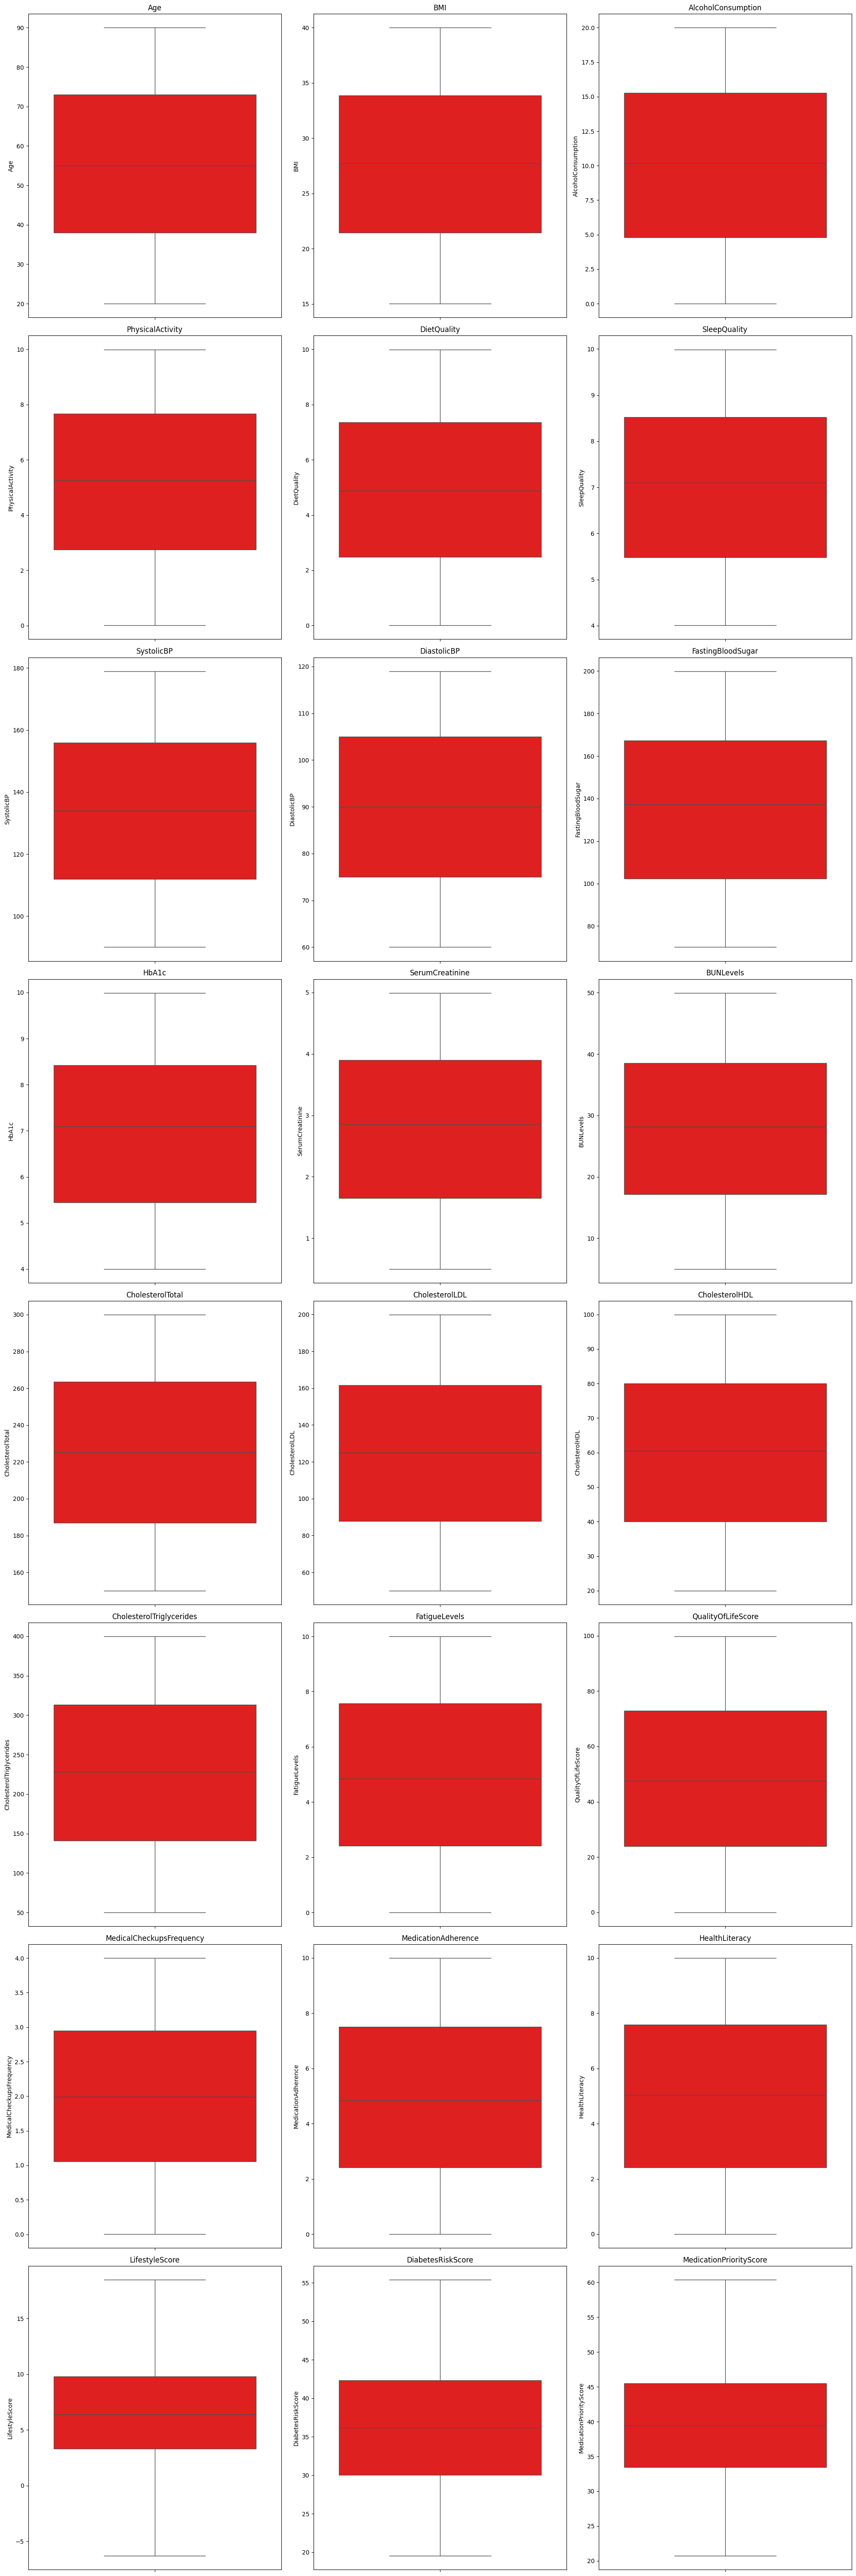

In [405]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20, 60))

# Grid 8 baris x 3 kolom
for i in range(24):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y=num_dist.iloc[:, i], color='red')  # Membuat boxplot untuk setiap kolom
    plt.title(num_dist.columns[i])  # Menambahkan judul berdasarkan nama kolom
    plt.tight_layout()

plt.show()


tidak ada fitur yang outliers

In [406]:
# Melihat data duplicated dan missing value

print("Total Data Duplicated:", data.duplicated().sum())
print("")
print("Table Missing Value")
data.isna().sum() #Lihat apakah ada missing value

Total Data Duplicated: 0

Table Missing Value


,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


data sudah tidak ada yang duplicate dan tidak ada missing values

## Exploratory Data Analysis - Deskripsi Variabel

## Univariate Analysis

### Numerical Features

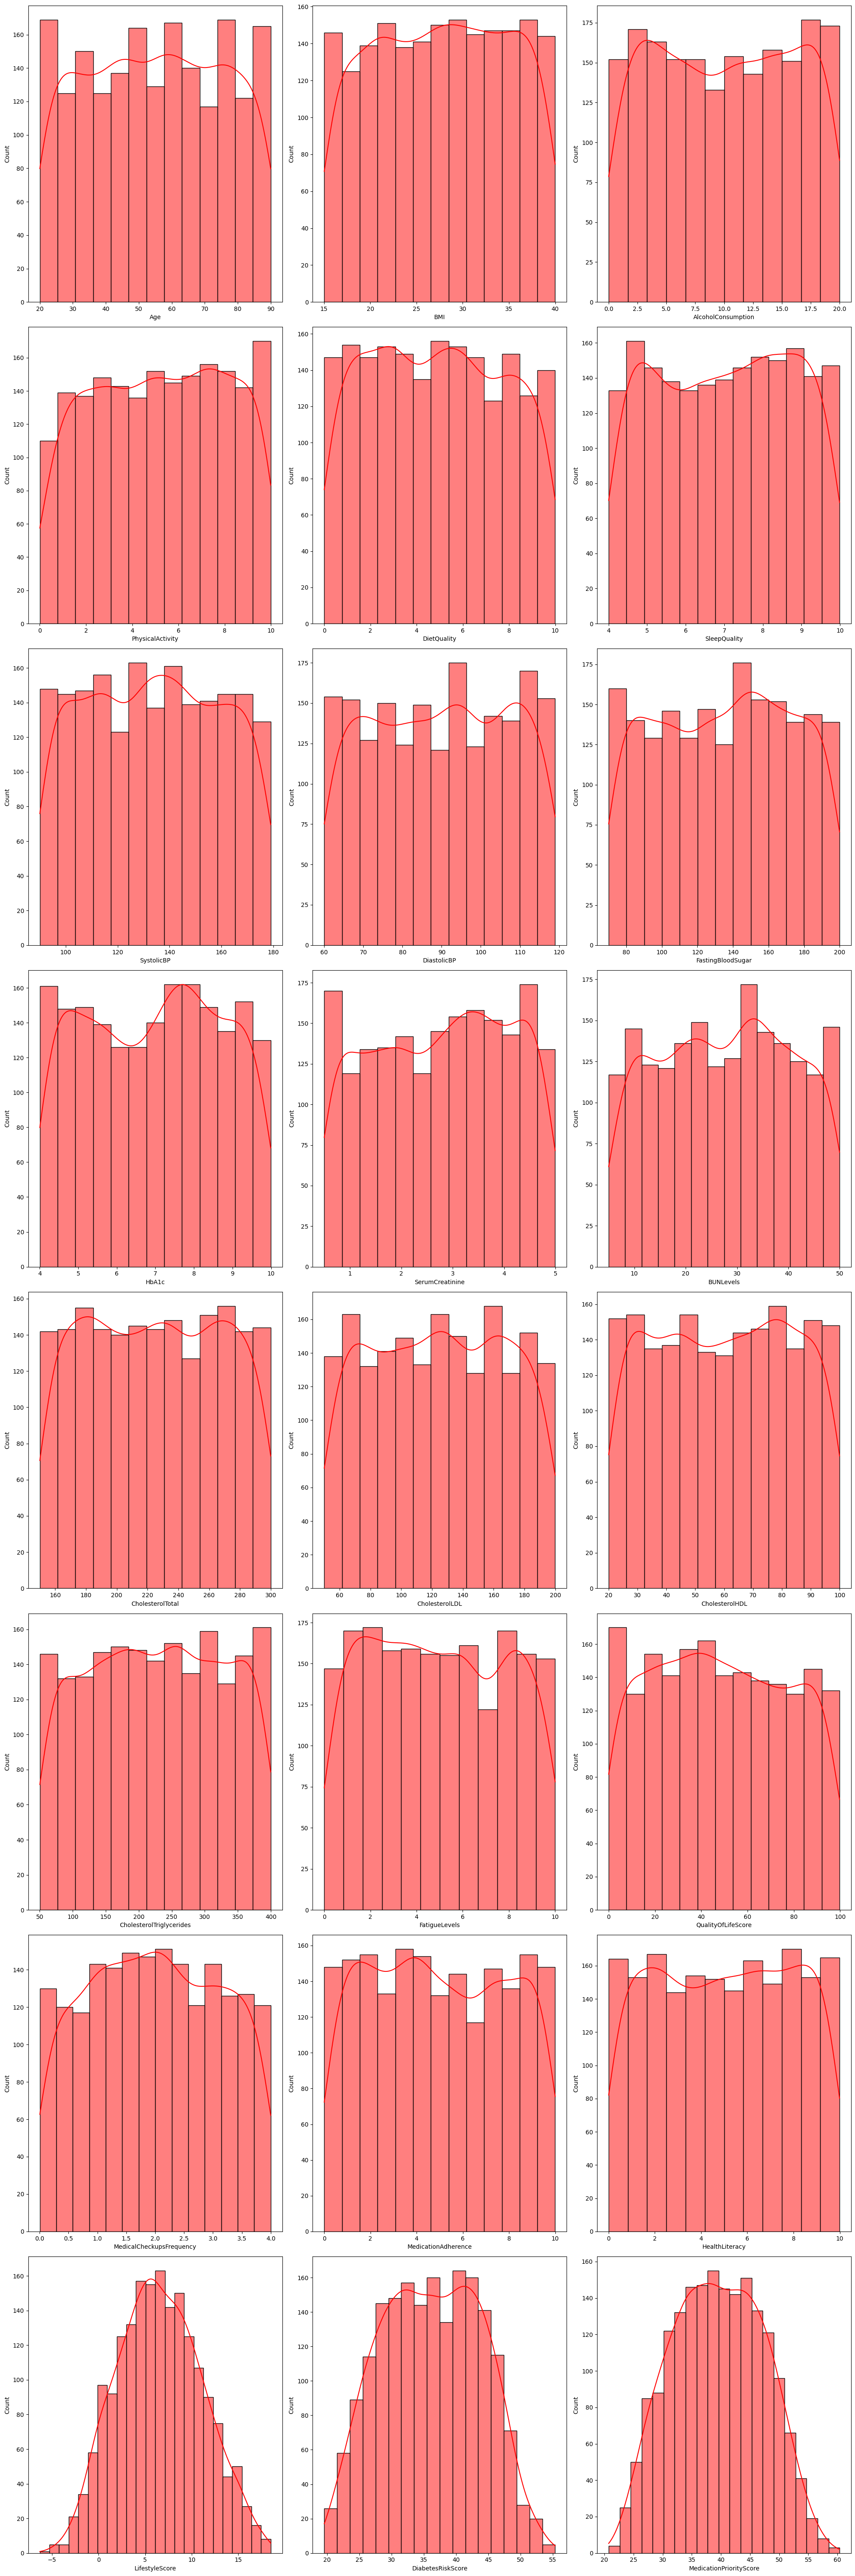

In [407]:
plt.figure(figsize=(20, 60))

for i in range(24):
    plt.subplot(8, 3, i + 1)
    sns.histplot(num_dist.iloc[:, i], color='red', kde=True)
    plt.tight_layout()

plt.show()

### **Distribusi Data**  
Sebagian besar variabel menunjukkan distribusi merata tanpa puncak yang extreme dimana mencerminkan persebaran data yang baik.

### **Jumlah Observasi**  
Tinggi batang histogram yang relatif seragam menunjukkan jumlah observasi konsisten di seluruh variabel.

### **Bentuk Distribusi**  
Distribusi variabel sebagian besar mendekati pola seragam dengan beberapa variabel cenderung normal.

### Categorical Features

In [408]:
categorical_features = [col for col in categorical_features if col not in non_used]
categorical_dist = data[categorical_features]

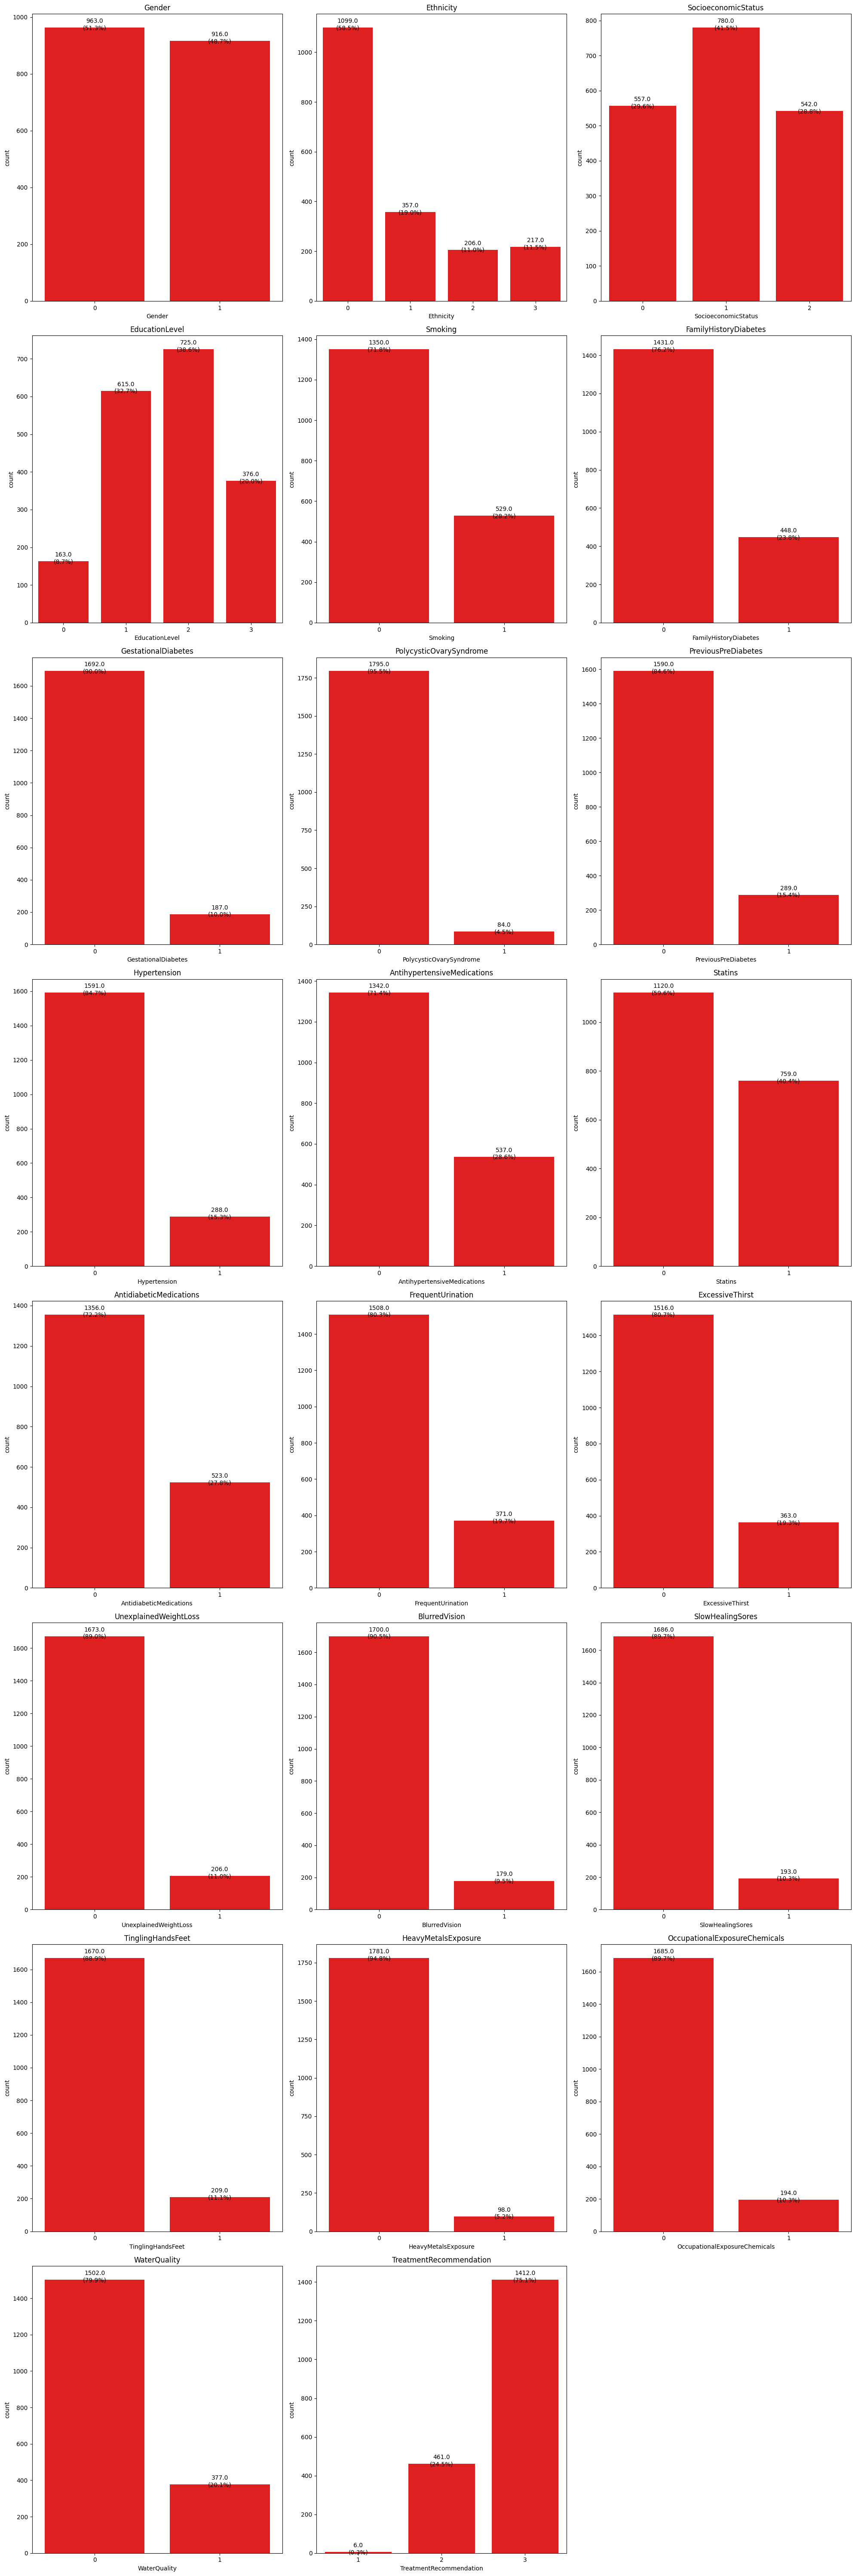

In [409]:
plt.figure(figsize=(20, 60))

for i in range(categorical_dist.shape[1]):
    plt.subplot(8, 3, i + 1)

    # Membuat countplot untuk setiap kolom
    ax = sns.countplot(x=categorical_dist.iloc[:, i], color='red')

    # Menambahkan jumlah sampel dan persentasenya
    total = len(categorical_dist)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{count}\n({percentage})',
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    # Menambahkan judul berdasarkan nama kolom
    plt.title(categorical_dist.columns[i])

    plt.tight_layout()

plt.show()

### **Gender**  
Distribusi gender cukup seimbang, dengan jumlah hampir sama antara laki-laki dan perempuan.  

### **Ethnicity**  
Kelompok etnis 0 mendominasi data, diikuti oleh etnis 2, sedangkan etnis 1 dan 3 memiliki jumlah lebih kecil.  

### **Socioeconomic Status**  
Status sosial ekonomi 1 paling banyak, diikuti oleh status 2 dan 0.  

### **Education Level**  
Tingkat pendidikan 2 dan 1 mendominasi, sedangkan tingkat 0 dan 3 lebih kecil.  

### **Smoking**  
Sebagian besar tidak merokok (label 0), sementara perokok (label 1) lebih sedikit.  

### **Family History of Diabetes**  
Mayoritas tidak memiliki riwayat diabetes keluarga (label 0), hanya sedikit yang memilikinya (label 1).  

### **Gestational Diabetes**  
Hampir semua tidak memiliki diabetes gestasional (label 0), sangat sedikit memilikinya (label 1).  

### **Polycystic Ovary Syndrome**  
Sangat sedikit yang memiliki sindrom ovarium polikistik (label 1).  

### **Previous Pre-diabetes**  
Mayoritas tidak memiliki riwayat pre-diabetes (label 0), hanya sebagian kecil memilikinya (label 1).  

### **Hypertension**  
Sebagian besar tidak memiliki hipertensi (label 0), sangat sedikit yang memilikinya (label 1).  

### **Antihypertensive Medications**  
Penggunaan obat antihipertensi (label 1) sangat sedikit dibandingkan yang tidak menggunakannya (label 0).  

### **Statins**  
Mayoritas tidak menggunakan statin (label 0), sementara penggunaan statin (label 1) lebih sedikit.  

### **Antidiabetic Medications**  
Sebagian besar tidak menggunakan obat antidiabetes (label 0).  

### **Frequent Urination**  
Mayoritas tidak mengalami buang air kecil berlebih (label 0).  

### **Excessive Thirst**  
Sebagian besar tidak mengalami haus berlebihan (label 0).  

### **Unexplained Weight Loss**  
Sebagian kecil melaporkan kehilangan berat badan yang tidak dijelaskan (label 1).  

### **Blurred Vision**  
Mayoritas tidak melaporkan penglihatan kabur (label 0).  

### **Tingling in Hands/Feet**  
Sebagian besar tidak mengalami kesemutan di tangan/kaki (label 0).  

### **Heavy Metal Exposure**  
Sangat sedikit yang melaporkan paparan logam berat (label 1).  

### **Occupational Exposure to Chemicals**  
Mayoritas tidak terpapar bahan kimia di tempat kerja (label 0).  

### **Water Quality**  
Sebagian besar tidak melaporkan masalah kualitas air (label 0).  

### **Diagnosis**  
Sebagian besar sampel negatif diabetes (label 0), sementara positif (label 1) lebih sedikit.  

## Multivariate Analysis

### Categorical Features

In [410]:
categorical_features = [col for col in categorical_features if col not in non_used]
categorical_dist = data[categorical_features]

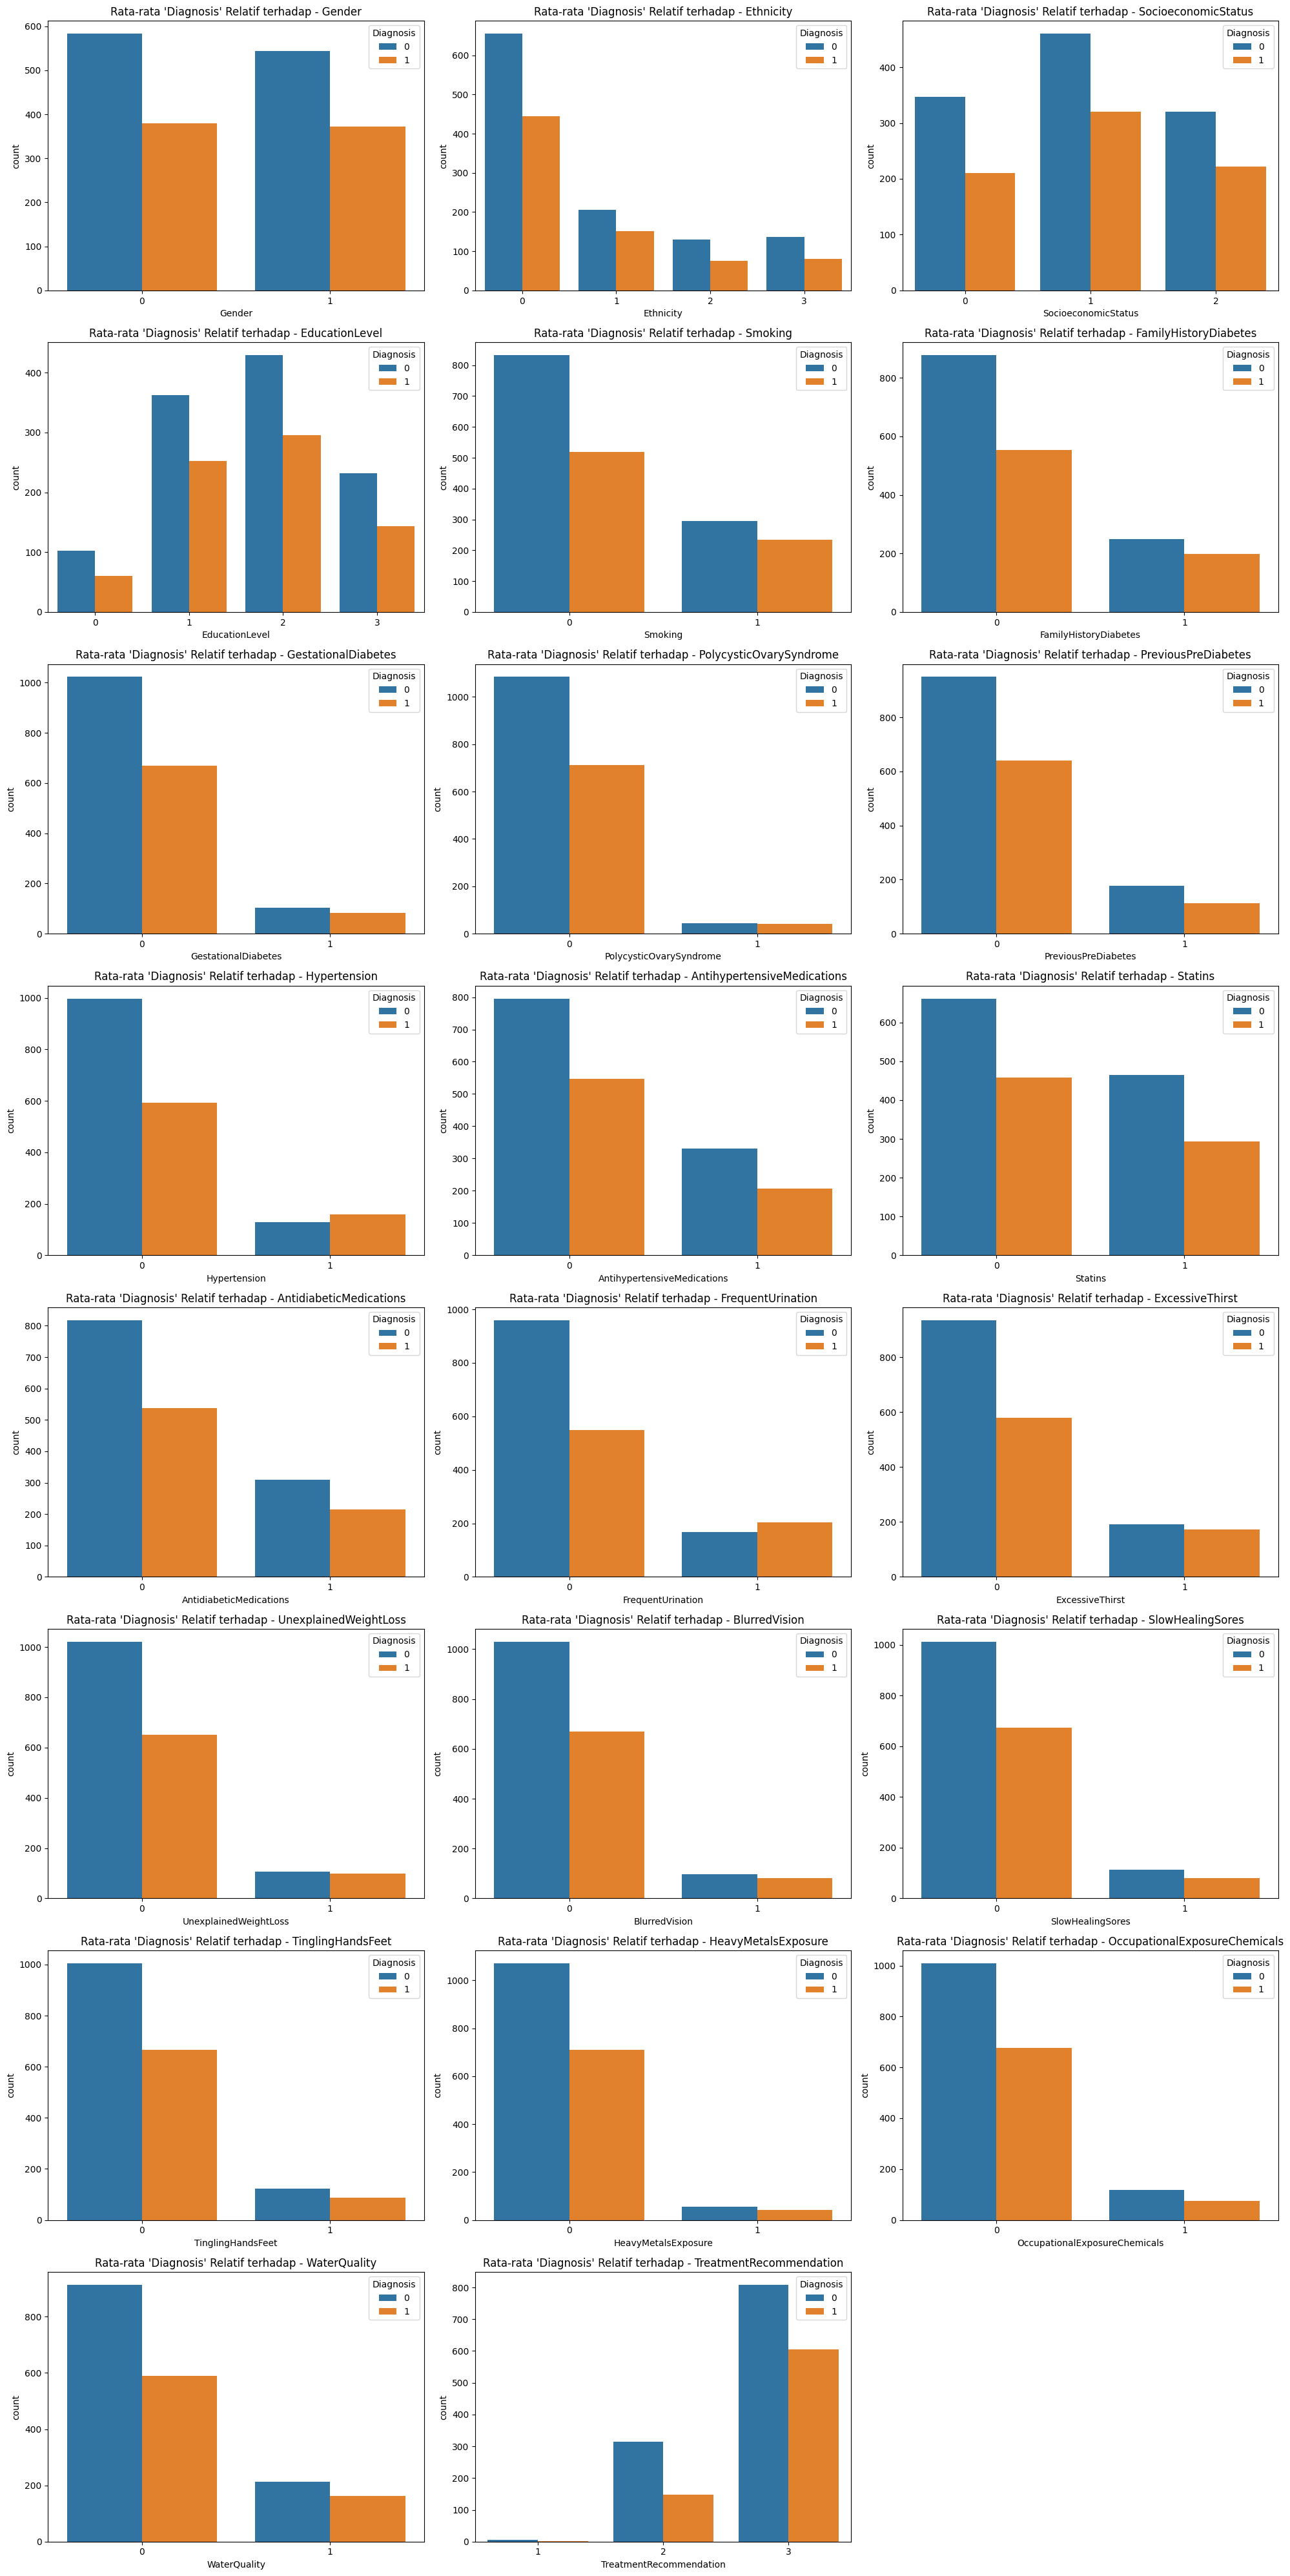

In [411]:
# Tentukan grid layout
fig, axes = plt.subplots(8, 3, figsize=(20, 40))
axes = axes.flatten()

# Iterasi dan plot
for i, col in enumerate(categorical_dist):
    sns.countplot(x=col, hue='Diagnosis', data=data, ax=axes[i])
    axes[i].set_title(f"Rata-rata 'Diagnosis' Relatif terhadap - {col}")
    axes[i].legend(title='Diagnosis')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Gender**  
Laki-laki dan perempuan memiliki diagnosis negatif lebih dominan dibandingkan positif.  

### **Ethnicity**  
Etnis 0 dan 2 mendominasi diagnosis negatif; diagnosis positif lebih sedikit di semua etnis.  

### **Socioeconomic Status**  
Status 1 memiliki diagnosis negatif terbanyak, diikuti oleh status 2 dan 0.  

### **Education Level**  
Pendidikan 1 dan 2 mendominasi diagnosis negatif; diagnosis positif lebih sedikit di semua tingkat.  

### **Smoking**  
Sebagian besar diagnosis negatif ditemukan pada non-perokok, diagnosis positif lebih kecil.  

### **Family History of Diabetes**  
Diagnosis negatif dominan pada yang tanpa riwayat keluarga diabetes.  

### **Gestational Diabetes**  
Diagnosis negatif mendominasi, sangat sedikit kasus positif ditemukan.  

### **Polycystic Ovary Syndrome**  
Mayoritas tanpa sindrom memiliki diagnosis negatif; kasus positif sangat sedikit.  

### **Previous Pre-diabetes**  
Mayoritas tanpa riwayat pre-diabetes memiliki diagnosis negatif; positif lebih sedikit.  

### **Hypertension**  
Mayoritas tanpa hipertensi memiliki diagnosis negatif.  

### **Antihypertensive Medications**  
Diagnosis negatif lebih banyak pada yang tidak menggunakan obat antihipertensi.  

### **Statins**  
Mayoritas diagnosis negatif ditemukan pada yang tidak menggunakan statin.  

### **Antidiabetic Medications**  
Diagnosis negatif dominan pada yang tidak menggunakan obat antidiabetes.  

### **Frequent Urination**  
Diagnosis negatif lebih banyak pada yang tidak sering buang air kecil.  

### **Excessive Thirst**  
Diagnosis negatif lebih banyak pada yang tidak mengalami haus berlebihan.  

### **Unexplained Weight Loss**  
Diagnosis negatif mendominasi pada yang tidak mengalami penurunan berat badan.  

### **Blurred Vision**  
Diagnosis negatif lebih banyak pada yang tidak mengalami penglihatan kabur.  

### **Tingling in Hands/Feet**  
Mayoritas diagnosis negatif ditemukan pada yang tidak mengalami kesemutan.  

### **Heavy Metal Exposure**  
Mayoritas diagnosis negatif ditemukan pada yang tidak terpapar logam berat.  

### **Occupational Exposure to Chemicals**  
Diagnosis negatif lebih banyak pada yang tidak terpapar bahan kimia.  

### **Water Quality**  
Diagnosis negatif dominan pada yang tidak melaporkan masalah kualitas air.  

### **Treatment Recommendation**  
Diagnosis negatif mendominasi di semua kategori rekomendasi pengobatan.  

### Categorical Features

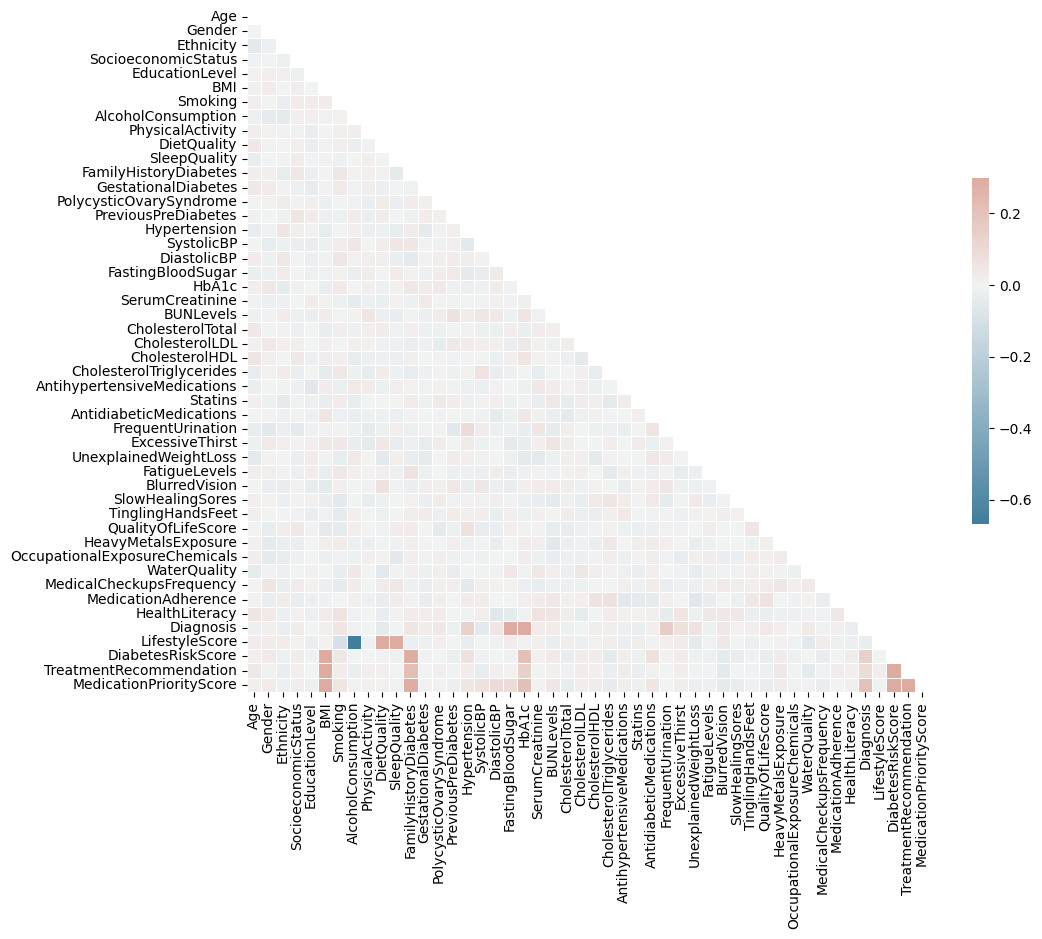

In [412]:
# Compute the correlation matrix, but only for numeric columns
corr = data.select_dtypes(include=np.number).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [413]:
# Compute the correlation matrix, but only for numeric columns
corr = data.select_dtypes(include=np.number).corr()

# Tampilkan tabel korelasi sebagai DataFrame
corr_table = pd.DataFrame(corr)

# Display tabel korelasi
corr_table


,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
Age,1.00,-0.00,-0.05,-0.01,0.01,0.01,0.01,-0.02,0.02,0.04,...,0.02,-0.04,-0.00,0.00,0.05,-0.02,0.02,0.01,0.04,0.01
Gender,-0.00,1.00,-0.01,-0.00,0.01,0.02,0.00,-0.04,0.01,0.00,...,-0.04,0.00,0.05,-0.03,0.03,0.01,0.02,0.03,-0.01,0.03
Ethnicity,-0.05,-0.01,1.00,-0.02,0.01,-0.01,-0.02,-0.04,0.00,-0.00,...,-0.03,-0.02,-0.03,0.03,-0.02,-0.02,0.03,-0.02,-0.03,-0.01
SocioeconomicStatus,-0.01,-0.00,-0.02,1.00,-0.02,0.02,0.03,0.01,-0.01,0.01,...,-0.01,-0.01,0.02,-0.03,0.01,0.03,0.01,0.03,0.01,0.02
EducationLevel,0.01,0.01,0.01,-0.02,1.00,-0.00,0.03,0.01,-0.03,-0.02,...,-0.00,0.01,0.01,-0.02,-0.02,-0.00,-0.02,-0.01,-0.00,-0.01
BMI,0.01,0.02,-0.01,0.02,-0.00,1.00,0.03,-0.01,-0.00,0.01,...,-0.02,-0.00,-0.02,-0.01,0.03,0.01,0.01,0.93,0.70,0.90
Smoking,0.01,0.00,-0.02,0.03,0.03,0.03,1.00,0.01,0.01,0.01,...,-0.01,-0.03,-0.04,-0.01,0.06,0.05,-0.10,0.04,0.02,0.05
AlcoholConsumption,-0.02,-0.04,-0.04,0.01,0.01,-0.01,0.01,1.00,0.02,-0.02,...,-0.02,0.04,0.02,0.02,-0.01,-0.01,-0.67,-0.00,-0.02,0.00
PhysicalActivity,0.02,0.01,0.00,-0.01,-0.03,-0.00,0.01,0.02,1.00,0.00,...,0.01,-0.00,-0.00,-0.02,-0.00,-0.01,-0.01,0.00,0.01,0.01
DietQuality,0.04,0.00,-0.00,0.01,-0.02,0.01,0.01,-0.02,0.00,1.00,...,0.00,-0.05,0.03,-0.03,-0.03,-0.04,0.65,0.00,0.01,0.01


Menghapus tabel yang korelasi absolut < 0.001

In [414]:
# Misalkan 'target_feature' adalah nama kolom target fitur
target_feature = 'Diagnosis'

# Filter korelasi lemah terhadap target fitur
weak_corr_with_target = corr_table[target_feature][(corr_table[target_feature] > -0.01) & (corr_table[target_feature] < 0.01)]

# Tampilkan hasil
weak_corr_with_target


,Diagnosis
EducationLevel,-0.00
AlcoholConsumption,-0.01
PhysicalActivity,-0.01
SleepQuality,-0.00
CholesterolLDL,-0.00
SlowHealingSores,0.01
OccupationalExposureChemicals,-0.01
MedicalCheckupsFrequency,-0.01


Pertimbangan untuk tidak menghapus CholesterolLDL karena berinteraksi dengan fitur lain seperti CholesterolTotal, CholesterolHDL, dan CholesterolTriglycerides

In [415]:
data.drop(['EducationLevel',
        'AlcoholConsumption',
        'PhysicalActivity',
        'SleepQuality',
        'SlowHealingSores',
        'OccupationalExposureChemicals',
        'MedicalCheckupsFrequency'], inplace=True, axis=1)
data.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,...,QualityOfLifeScore,HeavyMetalsExposure,WaterQuality,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,44,0,1,2,32.99,1,4.90,1,1,0,...,73.77,0,0,4.49,7.21,1,5.70,47.27,3,49.27
1,51,1,0,1,39.92,0,8.94,0,0,0,...,91.45,0,1,5.96,5.02,1,15.66,47.24,3,52.24
2,89,1,0,1,19.78,0,7.72,1,0,0,...,54.49,0,0,8.95,7.03,0,14.84,28.87,2,33.87
3,21,1,1,1,32.38,1,4.80,1,1,0,...,77.87,0,1,3.12,4.72,0,9.23,43.89,3,46.89
4,27,1,0,1,16.81,0,2.53,0,0,0,...,37.73,0,0,6.98,7.89,0,4.57,22.42,2,25.42


In [416]:
# Get the list of columns in your DataFrame
existing_columns = data.columns.tolist()

# Columns you want to drop
columns_to_drop = ['EducationLevel', 'AlcoholConsumption', 'PhysicalActivity',
                   'SleepQuality', 'SlowHealingSores', 'OccupationalExposureChemicals',
                   'MedicalCheckupsFrequency']

# Find the common columns between the existing columns and the columns to drop
valid_columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop only the valid columns
data.drop(columns=valid_columns_to_drop, inplace=True)

data.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,...,QualityOfLifeScore,HeavyMetalsExposure,WaterQuality,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,44,0,1,2,32.99,1,4.90,1,1,0,...,73.77,0,0,4.49,7.21,1,5.70,47.27,3,49.27
1,51,1,0,1,39.92,0,8.94,0,0,0,...,91.45,0,1,5.96,5.02,1,15.66,47.24,3,52.24
2,89,1,0,1,19.78,0,7.72,1,0,0,...,54.49,0,0,8.95,7.03,0,14.84,28.87,2,33.87
3,21,1,1,1,32.38,1,4.80,1,1,0,...,77.87,0,1,3.12,4.72,0,9.23,43.89,3,46.89
4,27,1,0,1,16.81,0,2.53,0,0,0,...,37.73,0,0,6.98,7.89,0,4.57,22.42,2,25.42


# Data Preparation

## Encoding Fitur Kategori

One-Hot Encoding pada fitur Ethnicity fitur kategorikal ini tidak memiliki urutan alami

In [417]:
from sklearn.preprocessing import  OneHotEncoder

data = pd.concat([data, pd.get_dummies(data['Ethnicity'], prefix='Ethnicity')],axis=1)
data.drop(['Ethnicity'], axis=1, inplace=True)
data.head()

,Age,Gender,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,PreviousPreDiabetes,...,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,44,0,2,32.99,1,4.90,1,1,0,0,...,7.21,1,5.70,47.27,3,49.27,False,True,False,False
1,51,1,1,39.92,0,8.94,0,0,0,0,...,5.02,1,15.66,47.24,3,52.24,True,False,False,False
2,89,1,1,19.78,0,7.72,1,0,0,0,...,7.03,0,14.84,28.87,2,33.87,True,False,False,False
3,21,1,1,32.38,1,4.80,1,1,0,1,...,4.72,0,9.23,43.89,3,46.89,False,True,False,False
4,27,1,1,16.81,0,2.53,0,0,0,0,...,7.89,0,4.57,22.42,2,25.42,True,False,False,False


## Train-Test-Split
menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [418]:
from sklearn.model_selection import train_test_split

X = data.drop(["Diagnosis"],axis =1)
y = data["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [419]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1879
Total # of sample in train dataset: 1503
Total # of sample in test dataset: 376


## Normalisasi
Normalisasi pada fitur numerical

In [420]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = [
    'Age',
    'BMI',
    'DietQuality',
    'SystolicBP',
    'DiastolicBP',
    'FastingBloodSugar',
    'HbA1c',
    'SerumCreatinine',
    'BUNLevels',
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides',
    'FatigueLevels',
    'QualityOfLifeScore',
    'MedicationAdherence',
    'HealthLiteracy',
    'LifestyleScore',
    'DiabetesRiskScore',
    'MedicationPriorityScore'
]

scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

X_train[numerical_features].head()

,Age,BMI,DietQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,QualityOfLifeScore,MedicationAdherence,HealthLiteracy,LifestyleScore,DiabetesRiskScore,MedicationPriorityScore
1463,0.26,0.46,0.44,0.61,0.27,0.76,0.11,0.56,0.12,0.68,0.85,0.84,0.93,0.80,0.37,0.36,0.44,0.64,0.32,0.39
271,0.67,0.94,0.63,0.22,0.95,0.30,0.74,0.56,0.59,0.05,0.14,0.47,0.83,0.34,0.23,0.99,0.76,0.45,0.91,0.86
184,0.74,0.37,0.19,0.17,0.71,0.67,0.71,0.17,0.51,0.59,0.95,0.95,0.58,0.16,0.37,0.37,0.10,0.35,0.36,0.43
1824,0.63,1.00,0.73,0.20,0.85,0.04,0.95,0.93,0.40,0.34,0.44,0.89,0.74,0.59,0.97,0.83,0.45,0.61,0.84,0.80
244,0.67,0.55,0.82,0.87,0.47,0.30,0.72,0.72,0.42,0.87,0.39,0.37,0.60,0.44,0.39,0.05,0.59,0.37,0.49,0.49


In [421]:
X_train[numerical_features].describe().round(4)

,Age,BMI,DietQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,QualityOfLifeScore,MedicationAdherence,HealthLiteracy,LifestyleScore,DiabetesRiskScore,MedicationPriorityScore
count,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00
mean,0.50,0.51,0.49,0.49,0.51,0.50,0.50,0.51,0.51,0.50,0.49,0.50,0.51,0.49,0.48,0.50,0.51,0.52,0.46,0.47
std,0.29,0.29,0.29,0.29,0.30,0.29,0.29,0.29,0.29,0.29,0.28,0.29,0.29,0.29,0.29,0.29,0.29,0.18,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.26,0.27,0.25,0.25,0.25,0.26,0.24,0.23,0.25,0.25,0.39,0.29,0.32
50%,0.51,0.52,0.50,0.49,0.53,0.50,0.52,0.52,0.52,0.51,0.49,0.50,0.52,0.48,0.47,0.49,0.52,0.51,0.47,0.47
75%,0.76,0.76,0.74,0.73,0.77,0.75,0.75,0.75,0.75,0.74,0.74,0.75,0.76,0.76,0.72,0.74,0.76,0.65,0.64,0.62
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Model Development

## Lazy Predict Library
LazyPredict adalah pustaka Python yang memudahkan proses pemilihan model machine learning. Ia melakukan ini dengan secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada kumpulan data.

Keuntungan menggunakan LazyPredict:
* Cepat dan efisien: LazyPredict dapat dengan cepat mengevaluasi dan membandingkan banyak model, menghemat waktu dan tenaga.
* Mempermudah identifikasi model potensial: Alih-alih mencoba berbagai model secara manual, LazyPredict membantu menemukan model yang berpotensi berkinerja baik pada data.
* Cocok untuk analisis awal dan pembuatan prototipe: LazyPredict memudahkan untuk memulai dengan proyek machine learning dengan cepat tanpa terjebak dalam detail pemilihan model.

In [422]:
!pip install lazypredict -q

In [423]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(X_train,X_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

 97%|█████████▋| 30/31 [00:11<00:00,  1.23it/s]

[LightGBM] [Info] Number of positive: 609, number of negative: 894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4618
[LightGBM] [Info] Number of data points in the train set: 1503, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405190 -> initscore=-0.383888
[LightGBM] [Info] Start training from score -0.383888


100%|██████████| 31/31 [00:12<00:00,  2.49it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.93               0.92     0.92      0.93   
LGBMClassifier                     0.92               0.91     0.91      0.92   
AdaBoostClassifier                 0.92               0.91     0.91      0.92   
RandomForestClassifier             0.91               0.89     0.89      0.91   
BaggingClassifier                  0.90               0.89     0.89      0.90   
DecisionTreeClassifier             0.88               0.86     0.86      0.87   
ExtraTreesClassifier               0.87               0.85     0.85      0.87   
LinearDiscriminantAnalysis         0.85               0.84     0.84      0.85   
CalibratedClassifierCV             0.85               0.84     0.84      0.85   
RidgeClassifierCV                  0.85               0.84     0.84      0.85   
RidgeClassifier             

Model terpilih:
* XGBClassifier
* RandomForestClassifier
* DecisionTreeClassifier



## Import Models

In [424]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [435]:
models = pd.DataFrame(index=['ROC AUC', 'KS'],
                      columns=['XGBClassfier', 'RandomForestClassifier', 'DecisionTreeClassifier'])

### Fungsi ROC AUC dan KS

In [436]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]

    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]

    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

### Fungsi Confusion Matrix

In [442]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## XGBClassifier

Training is success!
ROC AUC: 0.9551
KS: 0.8549 (p-value: 1.738e-67)
Classification report XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       233
           1       0.95      0.87      0.91       143

    accuracy                           0.93       376
   macro avg       0.93      0.92      0.93       376
weighted avg       0.93      0.93      0.93       376



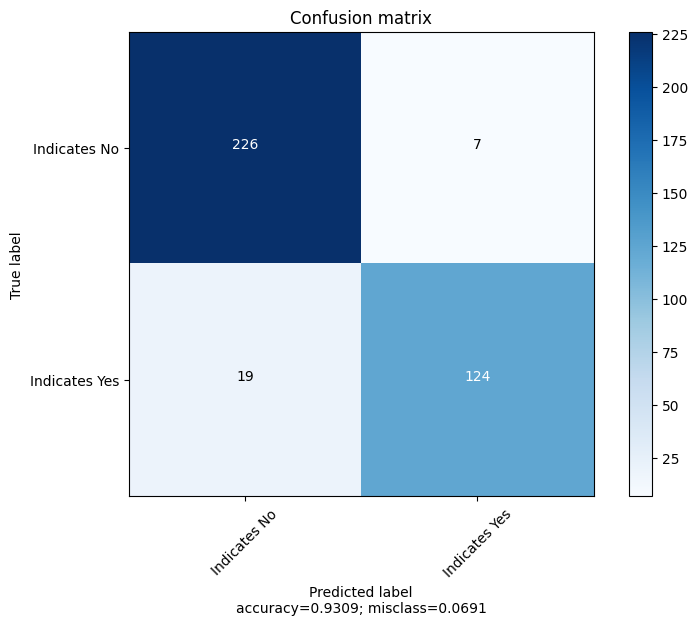

In [438]:
# Main pipeline for fitting.
model_XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_XGB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_XGB.predict_proba(X_test)
predicted = model_XGB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report XGBoost Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Indicates No","Indicates Yes"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

models.loc['ROC AUC','XGBClassfier'] = auc
models.loc['KS','XGBClassfier'] = ks

## RandomForestClassifier

Training is success!
ROC AUC: 0.9505
KS: 0.8361 (p-value: 6.888e-64)
Classification report RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       233
           1       0.95      0.81      0.88       143

    accuracy                           0.91       376
   macro avg       0.92      0.89      0.90       376
weighted avg       0.92      0.91      0.91       376



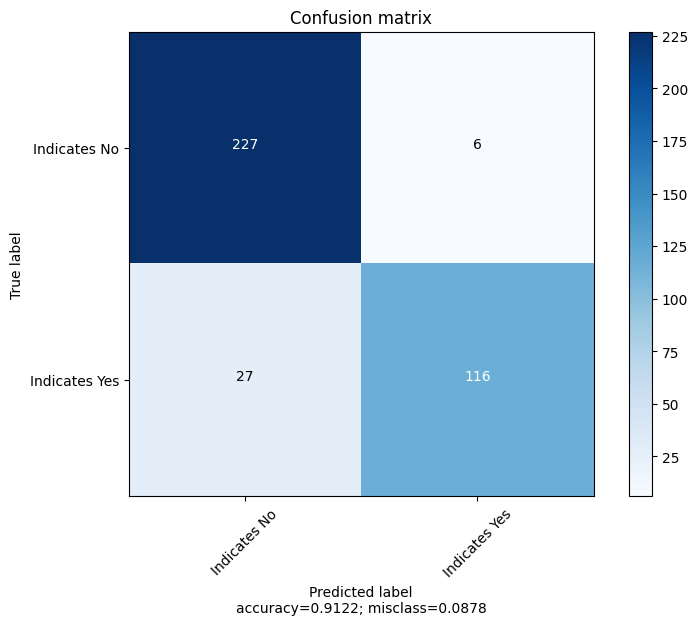

In [444]:
# Main pipeline for fitting.
model_rf = RandomForestClassifier(max_depth= 20)
model_rf.fit(X_train, y_train)
print("Training is success!")
y_pred = model_rf.predict_proba(X_test)
predicted = model_rf.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report RandomForestClassifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Indicates No","Indicates Yes"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

models.loc['ROC AUC','RandomForestClassifier'] = auc
models.loc['KS','RandomForestClassifier'] = ks

##Decision Tree Classifier


Accuracy Score: 0.8723404255319149

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       233
           1       0.86      0.79      0.82       143

    accuracy                           0.87       376
   macro avg       0.87      0.86      0.86       376
weighted avg       0.87      0.87      0.87       376


Confusion Matrix:
 [[215  18]
 [ 30 113]]


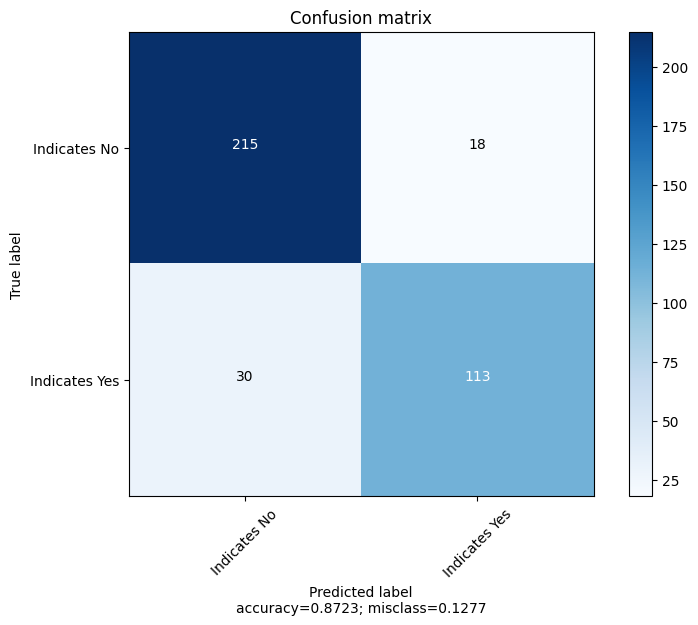

In [440]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Inisialisasi DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=20)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = dt_model.predict(X_test)


# Evaluasi model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
target_names = ["Indicates No","Indicates Yes"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

models.loc['ROC AUC','DecisionTreesClassifier'] = auc
models.loc['KS','DecisionTreesClassifier'] = ks

(0.8, 1.0)

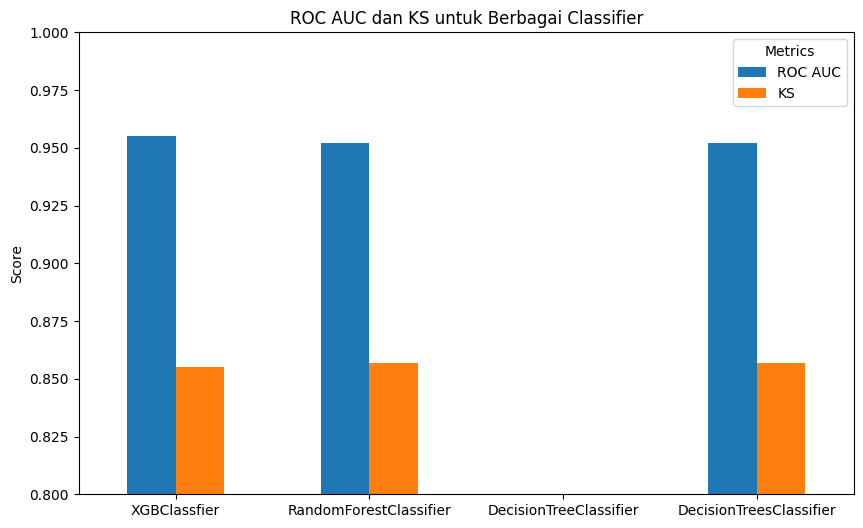

In [441]:
# Membuat barplot
models.T.plot(kind='bar', figsize=(10, 6))

# Menambahkan judul dan label
plt.title('ROC AUC dan KS untuk Berbagai Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.ylim(0.8, 1.0)

### Top 10 Features in XGBoost

<Figure size 1000x600 with 0 Axes>

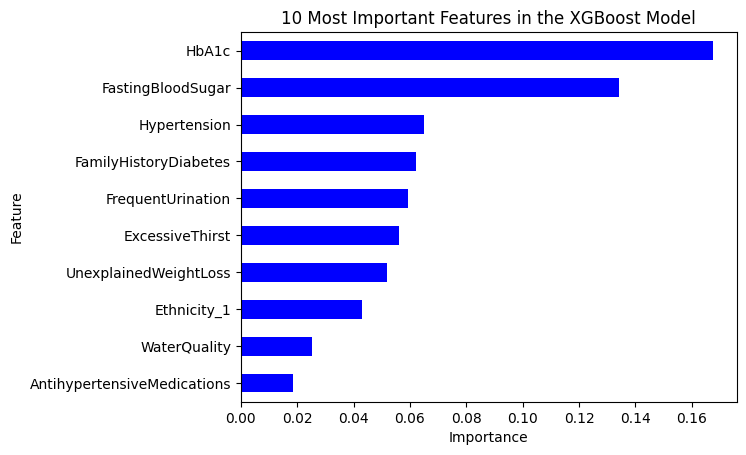

In [443]:
# Extract the features and importance of the XGBoost model
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
feature_importances['importance'] = model_XGB.feature_importances_

# Visualization of the 10 most important features
plt.figure(figsize=(10, 6))
plot = feature_importances.sort_values('importance', ascending=False).head(10).plot.barh(color='blue', legend=None)
plot.set_yticklabels(feature_importances.sort_values('importance', ascending=False).head(10).feature)
plt.title('10 Most Important Features in the XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()
